© Texas A&M

# Week 7:  SQL for Data Analytics 
** Source: SQL for Data Analytics Ch6

## 0.  Getting Started

#### markdown file: Jupyter notebook is the ability to interweave code and explanatory text into a single, coherent document. 
* https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet
* '#' for titles ;  '##' for major headings ;   '###' for subheadings ;   '####' for 4th level subheadings; 
* double underscore '__' or double asterisk '**' for bold strings;    
* single underscore '_' or single asterisk '*'  for italic texts;
* a dollar sign '$' for mathematical symbols   

# for title
## for major headings ;  
### for subheadings ;
#### for 4th level subheadings; 
__enclosed with double underscore__ or **enclosed with double astrisk** for Bold text; <br>
_enclosed with single underscore_ or *enclosed with single astrisk* for Italic text ; <br>
$\alpha$ and $\sigma$ for Mathematical symbols <br>


#### Executing commands
 <shift+enter> to run a command and jump to the next cell; 
 <ctrl+enter> to run a command;  
 <alt+enter> to run a command and add a blank command line 

####  dot notations:  
** A dot “.” means “in here” <br>
** **object.method** or **object.attribute**: 
**(https://docs.python.org/3/glossary.html) <br>
attribute: A value associated with an object which is referenced by name using dotted expressions. For example, if an object o has an attribute a it would be referenced as <o>.<a> <br>
method: A function which is defined inside a class body.   <br>
** <shift+tab> to access syntex and docstring <br>
** Hit <tab> with cursor placed after dot to access all possible methods. <br>

# 1. Create Connection
#### Using python with your Database
You have been running SQL against the PostgreSQL server and obtaining results via client software such as pgAdmin. PostgreSQL DBMS, as well as other relational DBMSs, allows for many ways of client connection. You can run your SQL through any of these connection methods and retrieve data in the same way as with pgAdmin. 
When you use Python for data analytics, you will use a specific Python libraries such as **psycopg2** and **sqlalchemy**. These libraries will connect to the PostgreSQL server and handle traffic between your Python script and the database server.  
While **psycopg2** is a powerful database client for accessing PostgreSQL from Python, it is just a connector. It does nothing more than passing the SQL and the resulting data between your program and the database server. There are more things in Python that can help the data analytics process. You can enhance the code by using a couple of other packages—namely, **pandas** and **SQLAlchemy**. <br> First, you will learn about  **SQLAlchemy**, a Python SQL toolkit that maps representations of objects to database tables. This will enable you to access a database seamlessly without worrying about connections and Python objects. Next, you will learn about **pandas**—a Python package that can perform data manipulation and facilitate data analysis.
*  **create_engine** object contains information about the type of database and a connection pool.  The connection pool allows for multiple connections to the database that operate simultaneously. 
*  It exhibits lazy initialization: The connection pool does not create a connection until a query is sent to be executed. The term "lazy" is used to indicate that nothing happens (the connection is not formed) until a request is made. It does not use up resources to maintain the connection, but activates the connection once the query is sent and deactivates it after execution
*  Autocommits:  Another advantage of the SQLAlchemy Engine is that it automatically commits (autocommits) changes to the database due to CREATE TABLE, UPDATE, INSERT, or other statements that modify our database. Any changes made within python session will be automatically committed to your database.

In [1]:
## import psycopg2 
from sqlalchemy import create_engine, text  
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell  
## It handles the read-eval-print loop (REPL) and provides various interactive features 
##answer next time
InteractiveShell.ast_node_interactivity = "all"
## Next, you will configure your notebook to display plots and visualizations inline. You can do this with the following command:
%matplotlib inline 

 

In [2]:
## define connecion string: This is a generic connection string for psycopg2. 
## You need to fill in your parameters to create the database Engine object. 
cnxn_string = ("postgresql+psycopg2://{username}:{pswd}"
              "@{host}:{port}/{database}")
print(cnxn_string)
cnxn_string.format(
    username="postgres",
    pswd="stat1234", 
    host="pg_container", ## container name, or postgres (docker-compose.yml), or Hostname (e.g. 454cf575dda5) as in the Config 
    port=5432,
    database="sqlda")

postgresql+psycopg2://{username}:{pswd}@{host}:{port}/{database}


'postgresql+psycopg2://postgres:stat1234@pg_container:5432/sqlda'

#### Parameters (username, pswd, host, port, and database)

See the environment variables (docker-compose.yml or server.json file) or run 
*docker container inspect {container_ID}*  
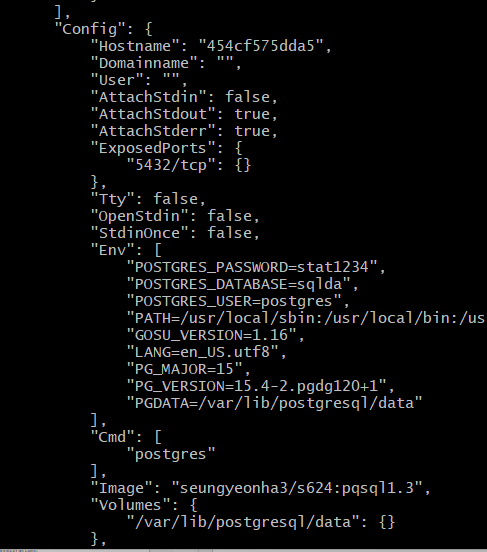

In [3]:

engine = create_engine(cnxn_string.format(
    username="postgres",
    pswd="stat1234", 
    host="pg_container", ## container name, or postgres (docker-compose.yml), or Hostname (e.g. 454cf575dda5) as in the Config 
    port=5432,
    database="sqlda"))

#### Version comparability: Major migration document (1.4--> 2.0)
https://docs.sqlalchemy.org/en/20/changelog/migration_20.html

In [4]:
## SQLAlchemy1.4
## engine.execute("SELECT * FROM customers LIMIT 2;").fetchall()
## SQLAlchemy2.0 
engine.connect().execute(text("SELECT * FROM customers LIMIT 2;")).fetchall()

[(1, None, 'Arlena', 'Riveles', None, 'ariveles0@stumbleupon.com', 'F', '98.36.172.246', None, None, None, None, None, None, None, datetime.datetime(2017, 4, 23, 0, 0)),
 (2, 'Dr', 'Ode', 'Stovin', None, 'ostovin1@npr.org', 'M', '16.97.59.186', '314-534-4361', '2573 Fordem Parkway', 'Saint Louis', 'MO', '63116', 38.5814, -90.2625, datetime.datetime(2014, 10, 2, 0, 0))]

#### Create an object using pandas
* Pandas is a python library used for working with datasets (e.g., Functionality reading in data directly from a database, data visualization, data analysis tools)
* Our data can often be represented in a table form, with rows and columns, similar to how we would store data in our database. The DataFrame object in Pandas can be particularly useful.
1. Import the customers table from the sqlda database using the read_sql_table method in pandas.
2. print the first 5 rows; print specific row and columns using pandas.loc() vs. pandas.iloc() 

In [65]:
customers_data = pd.read_sql_table('customers',engine ) 
type(customers_data.head(5))

pandas.core.frame.DataFrame

In [66]:
## print the first 5 rows:  
customers_data.head(5).loc[:,'customer_id']

0    1
1    2
2    3
3    4
4    5
Name: customer_id, dtype: int64

In [67]:
##  
customers_data.describe()

,customer_id,latitude,longitude,date_added
count,50000.000000,44533.000000,44533.000000,50000
mean,25000.500000,36.874351,-92.917844,2014-11-10 11:25:14.304000256
min,1.000000,21.281100,-157.879500,2010-03-15 00:00:00
25%,12500.750000,33.276500,-102.071400,2012-07-18 00:00:00
50%,25000.500000,37.778600,-88.060400,2014-11-12 00:00:00
75%,37500.250000,40.686900,-80.449700,2017-03-02 00:00:00
max,50000.000000,64.856100,-70.198700,2019-06-29 00:00:00
std,14433.901067,5.340819,16.071365,NaN


In [68]:
## loc uses labels, while iloc uses integer positions.
## loc includes the last element of the range passed in it while iloc does not include the last one.
customers_data.loc[0:2,'first_name'] 
customers_data.iloc[0:2,:]
customers_data.iloc[0:2,2]

0    Arlena
1       Ode
2    Braden
Name: first_name, dtype: object

,customer_id,title,first_name,last_name,suffix,email,gender,ip_address,phone,street_address,city,state,postal_code,latitude,longitude,date_added
0,1,None,Arlena,Riveles,None,ariveles0@stumbleupon.com,F,98.36.172.246,None,None,None,None,None,NaN,NaN,2017-04-23
1,2,Dr,Ode,Stovin,None,ostovin1@npr.org,M,16.97.59.186,314-534-4361,2573 Fordem Parkway,Saint Louis,MO,63116,38.5814,-90.2625,2014-10-02


0    Arlena
1       Ode
Name: first_name, dtype: object

In [25]:
print((customers_data=='F').sum().sum())
## aggregation using Numpy
print(np.sum(customers_data.iloc[:,6]=='M'))

25044
24956


In [71]:
## group by aggregation using pandas groupby function
newt=pd.concat( [customers_data[customers_data['gender']=='F'].groupby("city", group_keys=True)[['gender']].count(),
customers_data[customers_data['gender']=='M'].groupby("city", group_keys=True)[['gender']].count() ,
customers_data.groupby("city", group_keys=True)[['gender']].count()],axis=1  )

In [26]:
newt.loc['Washington'] 
newt

gender     734
gender     713
gender    1447
Name: Washington, dtype: int64

,gender,gender,gender
city,,,
Abilene,27,30,57
Aiken,9,12,21
Akron,67,73,140
Albany,126,102,228
Albuquerque,127,99,226
...,...,...,...
Yonkers,13,13,26
York,10,10,20
Young America,38,42,80


In [77]:
## group-by aggregation using read_sql_query object
query = """select city, count(*) as number_of_customers,
           count(nullif(gender,'M')) as female,
           count(nullif(gender,'F')) as male
           from customers
           where city is not null
           group by city
           order by number_of_customers desc
           limit 10"""

In [68]:
top_cities_data = pd.read_sql_query("""select city, count(*) as number_of_customers,
           count(nullif(gender,'M')) as female,
           count(nullif(gender,'F')) as male
           from customers
           where city is not null
           group by city
           order by number_of_customers desc
           limit 10""",engine)

In [87]:
top_cities_data
type(top_cities_data)

,city,number_of_customers,female,male
0,Washington,1447,734,713
1,Houston,904,446,458
2,New York City,731,369,362
3,El Paso,713,369,344
4,Dallas,607,309,298
5,Atlanta,571,292,279
6,Sacramento,506,244,262
7,Los Angeles,466,241,225
8,San Antonio,426,207,219
9,Miami,426,195,231


pandas.core.frame.DataFrame

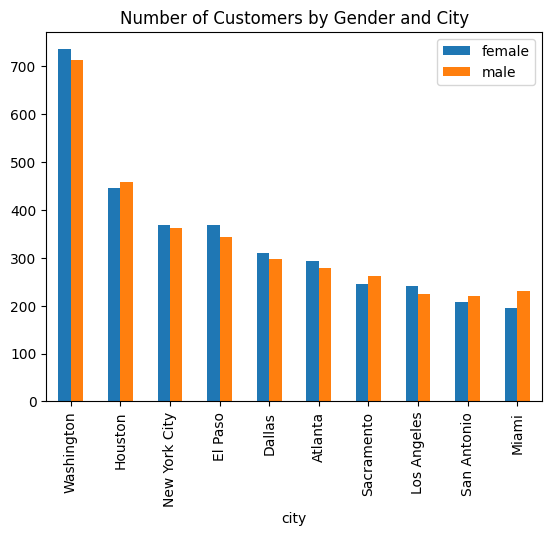

In [81]:
ax = top_cities_data.plot.bar('city',y=['female','male'],
                              title='Number of Customers by Gender and City')

# 2. Writing data to database using Python
* pandas.read_sql_table(query, engine)
* pandas.DataFrame.plot
* pandas.DataFrame.to_sql({newtable}, engine, ..)
* pandas.DataFrame.to_csv({outfile}, …)
* pandas.read_csv({outfile}, …,dtype={})
* #but what if you can't remember the name of the function?

In [72]:
top_cities_data.to_sql('temp2',engine,
                       index=False,if_exists='replace')

10

In [23]:
#get help using the help function
  help('pandas.DataFrame.to_sql')
#using tab and shift+tab for help in Jupyter notebooks
pd.DataFrame.
#now press tab, which will bring up all possible functions, so you can find the one you are looking for
pd.pandas.DataFrame.to_sql
#now press shift+tab, which will bring up the help file and input arguments (in case you forget them)

# 3. Reading and writing CSV files with Python

In [74]:
top_cities_data.to_csv('1016.csv',index=False)
my_data=pd.read_csv('1016.csv') 

In [75]:
 ##  help('pandas.read_csv')
my_data.iloc[:6,:]

,city,number_of_customers,female,male
0,Washington,1447,734,713
1,Houston,904,446,458
2,New York City,731,369,362
3,El Paso,713,369,344
4,Dallas,607,309,298
5,Atlanta,571,292,279


In [77]:
top_cities_data.to_sql('top_cities_data_test2',engine,
                       index=False,if_exists='replace'  )

10

In [82]:
test = pd.read_sql_query("""SELECT t.city, t.number_of_customers, SUM(s.sales_amount) 
FROM sales s 
JOIN customers c ON s.customer_id = c.customer_id 
JOIN temp2 t ON c.city = t.city GROUP BY 1, 2 ORDER BY 2 DESC;""",
                      engine)
test

,city,number_of_customers,sum
0,Washington,1447,7211615.175
1,Houston,904,4012994.146
2,New York City,731,4844309.108
3,El Paso,713,3915465.780
4,Dallas,607,3016611.179
5,Atlanta,571,3075851.129
6,Sacramento,506,3421386.767
7,Los Angeles,466,2840496.745
8,Miami,426,2012762.257
9,San Antonio,426,3256747.314


#### Write the following query to examine the relationship between the number of customers and the sales:
SELECT
  t.city,  t.number_of_customers,  SUM(s.sales_amount)
FROM  sales s
JOIN   customers c   ON s.customer_id = c.customer_id
JOIN  top_cities_data t   ON c.city = t.city
GROUP BY   1, 2
ORDER BY  2 DESC;

### Improving Python Write Speed with Copy
You can use the COPY command in conjunction with Python, SQLAlchemy, and pandas to deliver the same speed that you get with the COPY command in psql. For instance, say you define the following function:

In [71]:
import csv
from io import StringIO
def psql_insert_COPY(table, conn, keys, data_iter):
    # gets a DBAPI connection that can provide a cursor
    dbapi_conn = conn.connection
    with dbapi_conn.cursor() as cur:
        s_buf = StringIO()
        writer = csv.writer(s_buf)        
        writer.writerows(data_iter)         
        s_buf.seek(0)
        columns = ', '.join('"{}"'.format(k) for k in keys)         
        if table.schema:
            table_name = '{}.{}'.format(table.schema, table.name)
        else:
            table_name = table.name
        sql = 'COPY {} ({}) FROM STDIN WITH CSV'.format(table_name, columns)
        print(sql)
        cur.copy_expert(sql=sql, file=s_buf)
        help(engine.connect().connection.cursor().copy_expert)
        

In [70]:
## You can then leverage the method parameter in to_sql, as shown here:
top_cities_data.to_sql(
    'testtest', 
    engine , 
    index=False,
    if_exists='replace',
    ## method=psql_insert_COPY
)

COPY testtest ("city", "number_of_customers", "female", "male") FROM STDIN WITH CSV


In [40]:
dbapi_conn = engine.connect().connection

### Activity 6.01: Using an External Dataset to Discover Sales Trends
* In this activity, you are going to use the United States Census data on public transportation usage by zip code to see whether the level of use of public transportation shows any correlation to ZoomZoom sales in a given location. This will allow you to practice the following skills:
Importing and exporting data to and from your database;  
Interacting with your database programmatically (for example, using Python in conjunction with SQLAlchemy and pandas)
Note
* 1. Before you begin, you will need to download the public transportation statistics by zip code dataset from GitHub
https://github.com/TrainingByPackt/SQL-for-Data-Analytics/blob/master/Datasets/public_transportation_statistics_by_zip_code.csv
* -- Data description:  
* public_transportation_pct: This is the percentage of the population in a postal code that has been identified as using public transportation to commute to work.
* public_transportation_population: This is the raw number of people in a zip code that use public transportation to commute to work.
* 2. Copy the data from the public transportation dataset to the ZoomZoom customer database by creating a table for it in the ZoomZoom dataset.
* 3. Find the maximum and minimum percentages in this data. Values below 0 will most likely indicate missing data.
* 4. Calculate the average sales amounts for customers that live in high public transportation regions (over 10%) as well as low public transportation usage (less than, or equal to, 10%).
* 5.  Read the data into pandas and plot a histogram of the distribution (hint: my_data.plot.hist(y='public_transportation_pct’)  if you read the data into a my_data DataFrame).
* 6. Using pandas, test using the to_sql function with and without the method=psqlinsert_copy parameter. How do the speeds compare? 
(Hint: In a Jupyter notebook, you can add %time in front of your command to see how long it takes.)
* 7. Group customers based on their zip code public transportation usage, rounded to the nearest 10%, and look at the average number of transactions per customer. 
* Export this data to Excel and create a scatterplot to better understand the relationship between public transportation usage and sales.
* 8. Based on this analysis, what recommendations would you have for the executive team at ZoomZoom when considering expansion opportunities?

In [96]:
my_data2=pd.read_csv('public_transportation_statistics_by_zip_code.csv') 
my_data2.to_sql('public_transportation',engine,
                       index=False,if_exists='replace'  )

120

In [97]:
my_data2.describe()

,zip_code,public_transportation_pct,public_transportation_population
count,33120.000000,3.312000e+04,33120.000000
mean,49666.334209,-1.115137e+07,230.352748
std,27564.925769,8.549920e+07,1313.382153
min,601.000000,-6.666667e+08,0.000000
25%,26634.750000,0.000000e+00,0.000000
50%,49739.000000,0.000000e+00,0.000000
75%,72123.500000,1.100000e+00,41.000000
max,99929.000000,1.000000e+02,35139.000000


In [98]:

query = """SELECT *
FROM customers c LEFT JOIN public_transportation p ON p.zip_code = c.postal_code::int 
WHERE public_transportation_pct<10 or public_transportation_pct>90 """
newt = pd.read_sql_query(query,engine) 

,customer_id,title,first_name,last_name,suffix,email,gender,ip_address,phone,street_address,city,state,postal_code,latitude,longitude,date_added,zip_code,public_transportation_pct,public_transportation_population
0,2,Dr,Ode,Stovin,None,ostovin1@npr.org,M,16.97.59.186,314-534-4361,2573 Fordem Parkway,Saint Louis,MO,63116,38.5814,-90.2625,2014-10-02,63116,6.3,1452
1,4,None,Jessika,Nussen,None,jnussen3@salon.com,F,159.165.138.166,615-824-2506,224 Village Circle,Nashville,TN,37215,36.0986,-86.8219,2017-09-03,37215,0.6,66
2,6,None,Cortie,Locksley,None,clocksley5@weather.com,M,140.194.59.82,None,6537 Delladonna Drive,Miami,FL,33158,25.6364,-80.3187,2013-03-31,33158,2.3,68
3,8,None,Rutger,Humblestone,None,rhumblestone7@digg.com,M,77.10.235.191,203-551-6530,21376 Esker Center,New Haven,CT,06510,41.3087,-72.9271,2013-12-15,6510,8.8,127
4,14,None,Derry,Lyburn,None,dlyburnd@woothemes.com,M,230.59.185.87,501-457-5529,8507 Garrison Junction,North Little Rock,AR,72118,34.8337,-92.3289,2014-05-23,72118,2.2,191


<Axes: ylabel='Frequency'>

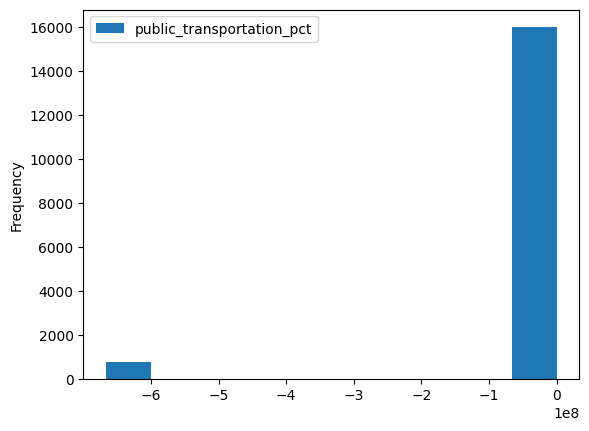

In [99]:
newt.iloc[:5, :]
newt.plot.hist(y='public_transportation_pct') 

<Axes: xlabel='tenth'>

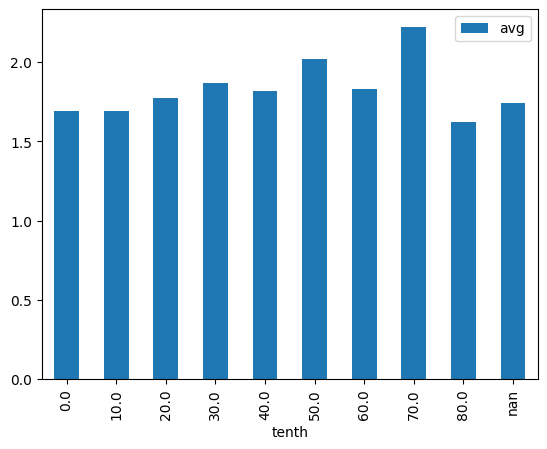

In [100]:
## Group customers based on their zip code public transportation usage, rounded to the nearest 10%, 
## and look at the average number of transactions per customer.
newt2 = pd.read_sql_query("""
WITH t2 AS (	   
WITH t1 AS (SELECT *
 , ROUND(public_transportation_pct/10 ) *10 AS tenth
FROM public_transportation
			WHERE ROUND(public_transportation_pct/10 ) *10>=0 and 
			ROUND(public_transportation_pct/10 ) *10 is not null )
SELECT postal_code::int,s.customer_id, t1.tenth, 
	count(sales_amount) over (partition by s.customer_id)
FROM customers c
LEFT JOIN t1 ON t1.zip_code = c.postal_code::int
INNER JOIN sales s on s.customer_id = c.customer_id )
SELECT avg(count), tenth FROM t2 GROUP by tenth order by tenth ;""", engine)
newt2.plot.bar(x='tenth', y='avg') 

# 4. Python basics (following Ch 1 of Python Workshop textbook)

## 4.1 Basic math operations
* Standard Math Operation Fig 1.2.
* 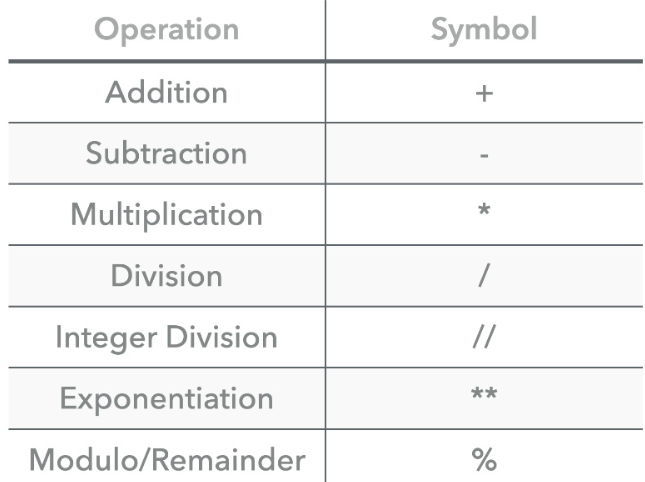
* Parentheses are meaningful in Python. When it comes to computation, Python always computes what is in parentheses first.

In [73]:
#run these basic examples on your machine
5+2
5-2
5*2
5/2
5//2 #integer division
int(5/3)
5//3 #integer division
5/3
5**2 #5 squared
5%2 #modulus
type(5+2)
type(5-2)
type(5*2)
type(5/2)
type(5//2) #integer division
type(5**2) #5 squared
type(5%2) #modulus

7

3

10

2.5

2

1

1

1.6666666666666667

25

1

int

int

int

float

int

int

int

In [74]:
#remember your order of operations (when in doubt, use parentheses)
(100 - 5 ** 3) / 5
6 + 15 % 4 
2 ** 2 + 24 // 4

-5.0

9

10

In [ ]:
#spacing can improve readability (but doesn't change the meaning)
6+5
6 + 5

## 4.2 Integer vs. float
 * Floats, by contrast, are Python types represented as decimals. All rational numbers expressed as fractions can be represented as floats.
 * type() to obtain object type

In [ ]:
type(6)
type(6.0)

In [ ]:
#what happens when you add an int and float?
5 + 3.14
type(5 + 3.14)

In [75]:
#convert to different types
int(7.99999999)
float(6)

7

6.0

## 4.3 Complex numbers
* Python includes complex numbers as an official type.
* fourier transform
* complex random matrix: social networking
* $i = \sqrt{-1}$: Complex numbers arise when taking the square roots of negative numbers.  Python uses j instead of i.
* Divide 2 + 3j by 1 – 5j, enclosing both operations within parentheses:

In [78]:
#Python uses j instead of i to represent sqrt(-1)
a= (2 + 3j)/(1 - 5j)
a
b= 1+3j
type(3j*3j)
3j*3j

(-0.5+0.5j)

complex

(-9+0j)

In [47]:
## Do not run
## from matplotlib import pyplot as plt
## plt.arrow(np.real(a), np.imag(a), np.real(b), np.imag(b), length_includes_head=True)

## 4.4 Variables
* variables are memory slots that can store elements of any type. The name variable is meant to be suggestiveas the values assigned to variables may change throughout a program:  Python variables are introduced the same way as in math: by using the equals sign.
*  order matters;  x = 3.14 means that the value 3.14 gets assigned to the x variable. However, 3.14 = x will produce an error because it’s impossible to assign a variable to a number. Variable assignment must have the variable on the left of the equals sign, and the value on the right. 

In [6]:
x = 2
x + 1

3

In [7]:
x = 3.0
x + 1

4.0

In [12]:
#Casting: python is dynamically typed (vs. unchanging types)
y = 10
type(y)
y = y - 10.0
type(y)

int

float

### 4.4.1 Reassigning variables in terms of themselves

In [79]:
x = 3
x = x + 1
x

x = 3
x += 1
x

x = 3
x -= 1 ## x= x-1
x

x = 3
x *= 5
x

4

4

2

15

In [80]:
y=2
i=1
while  i <=5:
    y *= 2
    i += 1 
    print(y)

4
8
16
32
64


In [6]:
# Python keywords are reserved in the language, and also may not be used for variable names. 
import keyword
print(keyword.kwlist)

['False', 'None', 'True', 'and', 'as', 'assert', 'async', 'await', 'break', 'class', 'continue', 'def', 'del', 'elif', 'else', 'except', 'finally', 'for', 'from', 'global', 'if', 'import', 'in', 'is', 'lambda', 'nonlocal', 'not', 'or', 'pass', 'raise', 'return', 'try', 'while', 'with', 'yield']


In [ ]:
# variables can not start with numbers, special characters, keywords, nor built-in types
$&^city = 5
1st_number=1

In [ ]:
# variables cannot contain spaces between characters
best city = 'College Station'

In [ ]:
# keywords to avoid when naming variables (Python will throw an error)
import keyword
print(keyword.kwlist)

In [ ]:
# underscores are helpful
best_city = 'College Station'
best_city

### 4.4.2 Declaring multiple variables (the Pythonic way)

In [81]:
x, y, z = 8, 5, 'cat'
x
y
z

8

5

'cat'

In [82]:
x = 8
x==9
type(x==9)

False

bool

## 4.5 Docstrings vs. comments

In [84]:
#any text following the # symbol on a single line is a comment.
# this is a comment
"""
Docstrings, short for document strings, state what a given document, such as a program, a function, or a class, actually does. 
The primary difference in syntax between a docstring and a comment is that docstrings are intended to be written over multiple lines, 
which can be accomplished with triple quotes;  
They also introduce a given document, so they are placed at the top.
"""

'\nDocstrings, short for document strings, state what a given document, such as a program, a function, or a class, actually does. \nThe primary difference in syntax between a docstring and a comment is that docstrings are intended to be written over multiple lines, \nwhich can be accomplished with triple quotes;  \nThey also introduce a given document, so they are placed at the top.\n'

## 4.6 Strings
* In Python, anything that goes between single (') or double (") quotes is considered a string. Strings are commonly used to express words, but they have many other uses, including displaying information to the user and retrieving information from a user.
* Examples: 'hello', "hello", 'HELLoo00', '12345', and 'fun_characters: !@ #$%^&*('.

In [13]:
bookstore = 'City Lights'
bookstore
bookstore = "City Lights"
bookstore

'City Lights'

'City Lights'

In [ ]:
#be consistent!
bookstore = 'City Lights"

In [ ]:
#strings with apostrophes
bookstore = 'Moe's'

In [12]:
bookstore = "Moe's"
bookstore

"Moe's"

In [13]:
bookstore = 'Moe\'s'
bookstore

"Moe's"

### 4.6.1 Multi line strings
* Line breaks will not work inside single or double quotes if you press the Return key.
* When strings need to span multiple lines, Python provides an escape option, \n, and triple quotes.

In [9]:
"""
During our vacation to San Francisco, we waited in a long
line by Powell St. Station to take the cable car. Tap
dancers performed on wooden boards. By the time our
cable car arrived, we started looking online for a
good place to eat. We're heading to North Beach."""
 


"\nDuring our vacation to San Francisco, we waited in a long\nline by Powell St. Station to take the cable car. Tap\ndancers performed on wooden boards. By the time our\ncable car arrived, we started looking online for a\ngood place to eat. We're heading to North Beach."

In [85]:
vacation_note2 =  """
During our vacation to San Francisco, we waited in a long
  line by Powell St. Station to take the cable car. Tap
    dancers performed on wooden boards. By the time our
       cable car arrived, we started looking online for a
          good place to eat. We're heading to North Beach.
"""
#notice the escape sequences denoting the line breaks (\n)

print(vacation_note2)


During our vacation to San Francisco, we waited in a long
  line by Powell St. Station to take the cable car. Tap
    dancers performed on wooden boards. By the time our
       cable car arrived, we started looking online for a
          good place to eat. We're heading to North Beach.



### 4.6.2 String concatenation

In [86]:
greeting = 'Howdy'
print(greeting + 'Sir.')
greeting = 'Howdy '
print(greeting + 'Sir.')
print(greeting * 5)

HowdySir.
Howdy Sir.
Howdy Howdy Howdy Howdy Howdy 


### 4.6.3 String interpolation

In [87]:
greeting = 'Howdy'
 
type(greeting) 
print('Should we greet people with', greeting, 'in College Station?')

str

Should we greet people with Howdy in College Station?


In [88]:
owner = 'Lawrence Ferlinghetti'
age = 100
print('The founder of City Lights Bookstore, {}, is now {} years old.'.format(owner,age)) ##format() converts python types are converted into strings
print('The founder of City Lights Bookstore,', owner, ', is now', age,'years old.' )
 


The founder of City Lights Bookstore, Lawrence Ferlinghetti, is now 100 years old.
The founder of City Lights Bookstore, Lawrence Ferlinghetti , is now 100 years old.


### 4.6.4 Built-in string functions

In [89]:
len(greeting)
type(greeting)

5

str

In [ ]:
#use tab completion to find variables
#type len(g then hit the tab button
#type greeting. then hit the tab button

In [90]:
greeting.lower()
greeting.upper()
greeting.endswith('y')
greeting.count('w')
greeting.count('w')
format(age).zfill(4)

'howdy'

'HOWDY'

True

1

1

'0100'

### 4.6.5 Casting

In [44]:
type('5')
'5' + '7'
int('5') + int('7')

str

'57'

12

### 4.6.6 Inputs from user
The input() function is a built-in Python function that allows user input. Note that the input given by the user will be taken as a string in Python, irrespective of the type of input the user gives. It’s a little different than what we have seen so far. 

In [91]:
print('What is your name?')
name = input()
print('Hello, ' + name + '.')
#If an error arises, restart the kernel

What is your name?


 Shawn


Hello, Shawn.


##### Activity 3 – using the input() function to rate your day
* In this activity, you will create an input type where you ask the user to rate their day on a scale of 1 to 10.
* Using the input() function, you will prompt a user for input and respond with a comment that includes the input. 
* In this activity, you will print a message to the user asking for a number. Then, you will assign the number to a variable and use that variable in a second message that you display to the user.

The steps are as follows:
* 1. Display a question prompting the user to rate their day on a number scale of 1 to 10.
* 2. Save the user’s input as a variable.
* 3. Display a statement to the user that includes the number.

In [93]:
print('Rate your day on a scale of 1 to 10')
rate = input()
if int(rate)<5:
    print('rate=', rate,'I am sorry, tomorrow the sun will be shine again')
else:
    print('rate=', rate,'Great, have a good one')
    

Rate your day on a scale of 1 to 10


 8


rate= 8 Great, have a good one


### 4.6.7 String slicing and indexing
* Indexing and slicing are regularly used in lists, a topic that we will cover in Chapter 2, Python Data Structures.
* In data analysis, indexing and slicing DataFrames is essential to keep track of rows and columns
* The characters in strings exist in specific locations. In other words, their order counts. The index is a numerical representation of where each character is located. The first character is at index 0, the second character is at index 1, and so on.

In [95]:
#Python starts at 0 when indexing
destination = 'College Station'
destination[0]
destination[1]
destination[-1]
destination[7]

'C'

'o'

'n'

' '

In [40]:
#Slicing:  A slice is a subset of a string or other element. 
## A slice could be the whole element or one character, but it’s more commonly a group of adjoining characters.
destination[0:7]
#Caution: lower bound of slice is always included, but upper bound is not!

'College'

In [96]:
#shortcut: omit the first numerical character to start at the beginning
destination[:10]
#shortcut: omit the last numerical character to go to the end and use a negative to specify how many before
destination[-3:]

'College St'

'ion'

## 4.7 Booleans and conditionals
* Booleans take the values of True or False.
* Programming based on multiple cases is often referred to as branching. Each branch is represented by a different conditional. Conditionals often start with an if clause, followed by else clauses. The choice of a branch is determined by Booleans, depending on whether the given conditions are True or False.

In [99]:
over_18 = True

type(over_18)
## over_18 = 'True'

type(over_18)

over_18 == True

bool

bool

True

In [50]:
over_21 = False
over_21

False

### 4.7.1 Logical operators
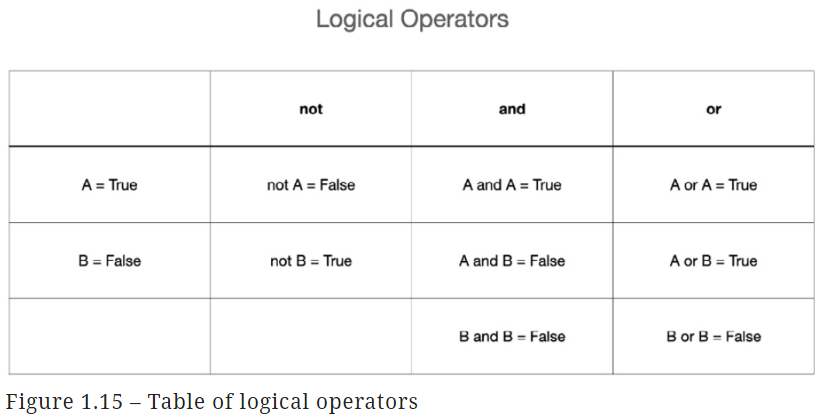

In [45]:
over_18 and over_21
over_18 or over_21
not over_18
not over_21 or (over_21 or over_18) #combine logical operators
not (over_21 or (over_21 or over_18)) #parentheses matter

False

True

False

True

False

### 4.7.2 Comparison Operators

In [55]:
age = 20
age < 13
age >= 4
age == 20
age != 20
age >= 20 and age <= 21 #combine with logical operators

False

True

True

False

True

In [100]:
#equivalence can take place across different data types
6 == 6.0 

#but not always
6 == '6'

#pro tip: cast objects to be the same type before checking equivalence

True

False

In [ ]:
age=20

#use parentheses for clarity
(20 <= age < 30) or (30 <= age < 40)

### 4.7.3 Comparing strings

In [47]:
#alphabetical order is used to compare strings
'a' < 'c'
'Austin' > 'College Station'

True

False

### 4.7.4 Conditionals (if)

In [103]:
age=input()
if int(age) < 18:
    print('You aren\'t old enough to vote.')

"""
important features of the if statement:
1) if keyword (start here)
2) everything between the if keyword and the colon (:) is the condition to be checked
3) colon(:) indicates the completion of the condition (compiler 
   then looks back to see if condition is true or false)
4) everything that follows the colon MUST be indented
"""

 42


'\nimportant features of the if statement:\n1) if keyword (start here)\n2) everything between the if keyword and the colon (:) is the condition to be checked\n3) colon(:) indicates the completion of the condition (compiler \n   then looks back to see if condition is true or false)\n4) everything that follows the colon MUST be indented\n'

In [105]:
#indentation matters (generally can be accomplished with 4 spaces or the tab key)
age=20
if age < 18:
    print('You aren\'t old enough to vote.')

In [ ]:
#indentation matters (generally can be accomplished with 4 spaces or the tab key)
age=20
if age < 18:
    print('You aren\'t old enough to vote.')

In [106]:
#Nested conditionals with more indentation
age=20
if age >=18:
    print('You can vote.')
    if age >= 21:
        print('You can play poker.')

You can vote.


### 4.7.5 Conditionals (if-else)

In [ ]:
age=20
if age >= 18:
    print('Welcome to our voting program.')
else:
    print('You aren\'t old enough to vote.')

In [ ]:
age = input()
if age >= 18:
    print('Welcome to our voting program.')
else:
    print('You aren\'t old enough to vote.')

### 4.7.6 Conditionals (elif)

In [ ]:
#sort for else if
age=20
if age <= 10:
    print('Listen, learn, and have fun.')
elif age <= 19:
    print('Go fearlessly forward.')
else:
    print('Each day is magical.')

## 4.8 Loops

### 4.8.1 While loops

In [107]:
# while loop example
i = 1 # initialize the variable
while i <= 10: #set up the condition that must be met for the loop to run
    print(i) #specify what should be done if the condition is met
    i += 1 #increment the variable
    
# Note: you will get stuck in infinite loops.  It happens to everyone.  When this happens,
# just restart the kernel.

1
2
3
4
5
6
7
8
9
10


### 4.8.2 Breaks
break is a special keyword in Python that is specifically designed for loops. 
If placed inside a loop, commonly in a conditional, break will immediately terminate the loop. It doesn’t matter what comes before or after the loop. The break is placed on its own line, and it breaks out of the loop.

In [34]:
x=100
while x <= 1000:
    x += 1
    if x % 17 == 0:
        print('', x, 'is the first number greater than 100 that is divisible by 17.')
        break

 102 is the first number greater than 100 that is divisible by 17.
 119 is the first number greater than 100 that is divisible by 17.
 136 is the first number greater than 100 that is divisible by 17.
 153 is the first number greater than 100 that is divisible by 17.
 170 is the first number greater than 100 that is divisible by 17.
 187 is the first number greater than 100 that is divisible by 17.
 204 is the first number greater than 100 that is divisible by 17.
 221 is the first number greater than 100 that is divisible by 17.
 238 is the first number greater than 100 that is divisible by 17.
 255 is the first number greater than 100 that is divisible by 17.
 272 is the first number greater than 100 that is divisible by 17.
 289 is the first number greater than 100 that is divisible by 17.
 306 is the first number greater than 100 that is divisible by 17.
 323 is the first number greater than 100 that is divisible by 17.
 340 is the first number greater than 100 that is divisible by

#### Activity 4 – finding the least common multiple (LCM)
* Find the LCM of 24 and 36
* 1. Set a pair of variables equal to 24 and 36 using input().
  2. Initialize the while loop, based on a Boolean that is True by default, with an iterator.
  3. Set up a conditional to check whether the iterator divides both numbers.
  4. Break the while loop when the LCM is found.
  5. Increment the iterator at the end of the loop.
Print the results using an f-string. The output is as follows:

The Least Common Multiple of 24 and 36 is 72.

In [110]:
x = 36
while x>=36 :
    x += 1
    if (x % 24==0) and (x % 36 ==0):
        print(x,'LCM')
        break

72 LCM


### 4.8.3 Exercise 19: The Real Estate Offer

In [36]:
print('A one bedroom in the Bay Area is listed at $599,000.')
print('Enter your first offer on the house.')
offer = abs(int(input()))
print('Enter your best offer on the house.')
best = abs(int(input()))
print('How much more do you want to offer each time?')
increment = abs(int(input()))

offer_accepted = False
while offer <= best:
    if offer >= 650000:
        offer_accepted = True
        print('Your offer of', offer, 'has been accepted!')
        break
    else:
        print('We\'re sorry, you\'re offer of',offer,'has not been accepted.')
        offer += increment


A one bedroom in the Bay Area is listed at $599,000.
Enter your first offer on the house.


 640000


Enter your best offer on the house.


 660000


How much more do you want to offer each time?


 10000


We're sorry, you're offer of 640000 has not been accepted.
Your offer of 650000 has been accepted!


In [38]:
print('Enter two positive integers')
var1 = abs(int(input()))
var2 = abs(int(input()))
 ## initiate gcf 
gcf = min(var1, var2)
while gcf <= min(var1, var2) and gcf>0:
    if var1%gcf==0 and var2%gcf==0:      
        print('GCF is ',gcf)
        break
    else:
        gcf -= 1
    

Enter two positive integers


 96
 72


GCF is  24


### 4.8.4 For loops

In [7]:
for i in 'Bryan':
    print(i)

B
r
y
a
n


In [39]:
for i in range(1,10):
    print(i)
#notice the range doesn't include 10

1
2
3
4
5
6
7
8
9


In [9]:
for i in range(10):
    print(i)
#providing only 1 argument to range uses 0 to start and gives the first 10 numbers

0
1
2
3
4
5
6
7
8
9


In [10]:
for i in range(1,11,2):
    print(i)
#the third argument is the increment

1
3
5
7
9


In [11]:
for i in range(3,0,-1):
    print(i)
#increments can be negative

3
2
1


### The continue keyword

In [41]:
#used to interrupt the instructions provided in the loop and return to the beginning of the loop
numa=[]
type(numa)

for num in range(10,100):
    if num % 2 == 0:
        continue
    if num % 3 == 0:
        continue
    if num % 5 == 0:
        continue
    if num % 7 == 0:
        continue
    print(num)
    numa.append(num)
    #what is the output from this loop?

11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97


In [42]:
numa

[11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

#### Activity 5 – building conversational bots using Python
You are working as a Python developer and you are building two conversational bots for your clients. You create a list of steps beforehand to help you out. These steps will help you build two bots that take input from the user and produce a coded response.
This activity aims to make you use nested conditionals to build two conversational bots. The first bot will ask the user two questions and include the user’s answer in each of its follow-up responses. The second bot will ask a question that requires a numerical answer. Different responses will be given to a different number of scales. This process will be repeated for a second question.

Let’s look at the steps.
* 1. For the first bot, the steps are as follows:
  2. Ask the user at least two questions.
  3. Respond to each answer as the chatbot. Include the answer in the response.
  4. For the second bot, the steps are as follows:
* 5. Ask a question that can be answered with a number scale, such as On a scale of 1-10….  Respond differently depending on the answer given.
* 6. State a different question following each answer that can be answered with a number scale. Respond differently, depending on the answer given.

In [43]:
print('What is your full name')
customer=input()
print('Hello, ', customer)
customer_low=[]
carmodels=[]

print('Select your car model among A, B, C, or others')
car = input()
if car in ['A','B','C']:
    print('On a scale of 1 to 10, where 1 is "extremely dissatisfied" and 10 is "extremely satisfied," how would you rate your satisfcation?')
    rate = int(input())
    if rate <=5:
        customer_low.append(customer)
    print('Your satisfcation rate on {} is {}'.format(car,rate))
else:
    print('What is your car model?')
    carex = input()
    carmodels.append(carex)

What is your full name


 Shawn


Hello,  Shawn
Select your car model among A, B, C, or others


 A


On a scale of 1 to 10, where 1 is "extremely dissatisfied" and 10 is "extremely satisfied," how would you rate your satisfcation?


 3


Your satisfcation rate on A is 3


In [44]:
print(customer_low)

['Shawn']
